In [448]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import ortho_group
import string

In [2]:
names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin", "name"]
usecols = [col for col in names if col != "origin" and col != "year"]

df = pd.read_csv('cars.txt',
                 names=names, usecols=usecols)

cars = df.copy()
for col in [col for col in df.columns if col != "name"]:
    cars[col] = pd.to_numeric(df[col], errors="coerce", downcast='float')

cars.dropna(axis=0, inplace=True)
cars.to_csv('cars_cleaned.csv', header=True, index=True)

named_cars = cars.copy()
cars = cars.drop(columns="name")
cars = (cars - cars.mean())/cars.std()
named_cars["idx"] = range(xv[:,0].size)
named_cars = named_cars.set_index("idx")
named_cars

NameError: name 'pd' is not defined

In [318]:
x = cars.values
u, s, vt = np.linalg.svd(x)
explained = [ np.sum(np.square(s[:k+1]))/np.sum(np.square(s)) for k in range(len(s))]
v = vt.T
xv = x @ v 
named_cars["v0"] = xv[:,0]
named_cars["v1"] = xv[:,1]

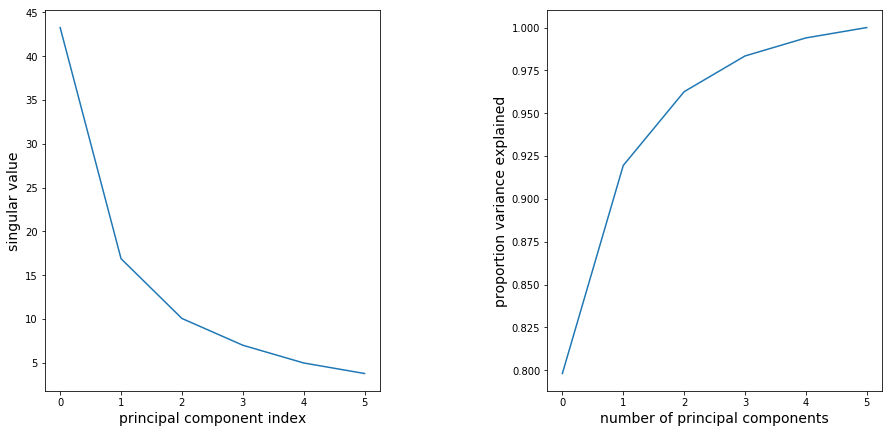

In [421]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
f.set_figwidth(15)
f.set_figheight(7)
f.subplots_adjust(wspace=0.5)
ax1.set_ylabel("singular value", fontsize=14)
ax1.set_xlabel("principal component index", fontsize=14)
ax1.plot(range(len(s)), s)
ax2.plot(range(len(s)), explained)
ax2.set_ylabel("proportion variance explained", fontsize=14)
ax2.set_xlabel("number of principal components", fontsize=14)
plt.show()

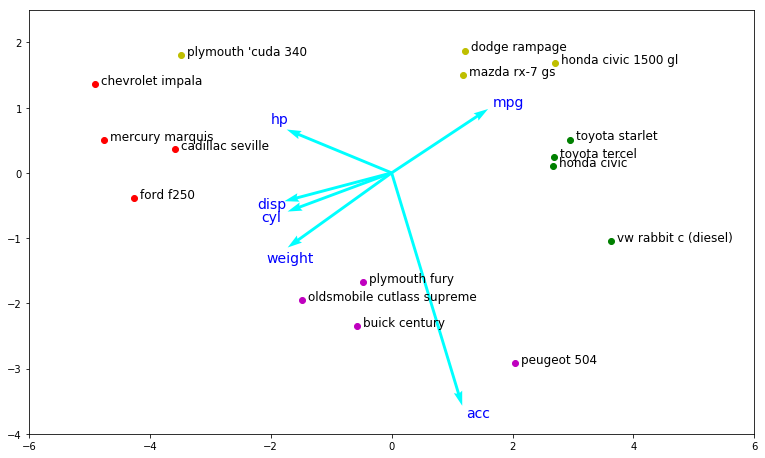

In [392]:
plt.figure(figsize=(13, 0.6*13))
plt.xlim(-6, 6)
plt.ylim(-4, 2.5)
plt.quiver([0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], 4*v[:6, 0], 4*v[:6, 1], 
           angles='xy', scale_units='xy', scale=1, color="cyan", width=0.004, zorder=3)

I = [6, 25, 66, 210]
J = [196, 323, 339, 344]
K = [297, 158, 220, 161]
L = [389, 11, 327, 331]
indices = I + J + K + L

for i in indices:
    car = named_cars.loc[i]
    plt.annotate(car["name"], xy=(car["v0"], car["v1"]), xytext=(car["v0"] + 0.1, car["v1"]), fontsize=12)

plt.plot(xv[I,0], xv[I,1], 'ro', zorder=2)
plt.plot(xv[J,0], xv[J,1], 'go', zorder=2)
plt.plot(xv[K,0], xv[K,1], 'mo', zorder=2)
plt.plot(xv[L,0], xv[L,1], 'yo', zorder=2)
plt.annotate("mpg", xy=(4.2*v[0,0], 4.2*v[0,1]), xytext=(4.2*v[0,0], 4.2*v[0,1]), fontsize=14, color="blue")
plt.annotate("cyl", xy=(5*v[1,0], 5*v[1,1]), xytext=(5*v[1,0], 5*v[1,1]), fontsize=14, color="blue")
plt.annotate("disp", xy=(5*v[2,0], 5*v[2,1]), xytext=(5*v[2,0], 5*v[2,1]), fontsize=14, color="blue")
plt.annotate("hp", xy=(4.6*v[3,0], 4.6*v[3,1]), xytext=(4.6*v[3,0], 4.6*v[3,1]), fontsize=14, color="blue")
plt.annotate("weight", xy=(4.8*v[4,0], 4.8*v[4,1]), xytext=(4.8*v[4,0], 4.8*v[4,1]), fontsize=14, color="blue")
plt.annotate("acc", xy=(4.2*v[5,0], 4.2*v[5,1]), xytext=(4.2*v[5,0], 4.2*v[5,1]), fontsize=14, color="blue")

plt.show()

In [474]:
X = cars.drop(columns="mpg").values
y = named_cars['mpg'].values
np.random.seed(1)

pca = PCA()
XX = pca.fit_transform(X)

cv = model_selection.KFold(n_splits=5, shuffle=True)
lr = LinearRegression()

In [480]:
scores = []
for j in [1, 2, 3, 4, 5]:
    score = -1*model_selection.cross_val_score(lr, XX[:, :j], y, cv=cv, scoring='neg_mean_squared_error').mean()
    scores.append(score)

In [481]:
scores

[20.56684455871582,
 19.082826232910158,
 18.645654678344727,
 18.369675064086913,
 18.762306022644044]